In [6]:
import numpy as np
import pandas as pd
import numpy.linalg as la

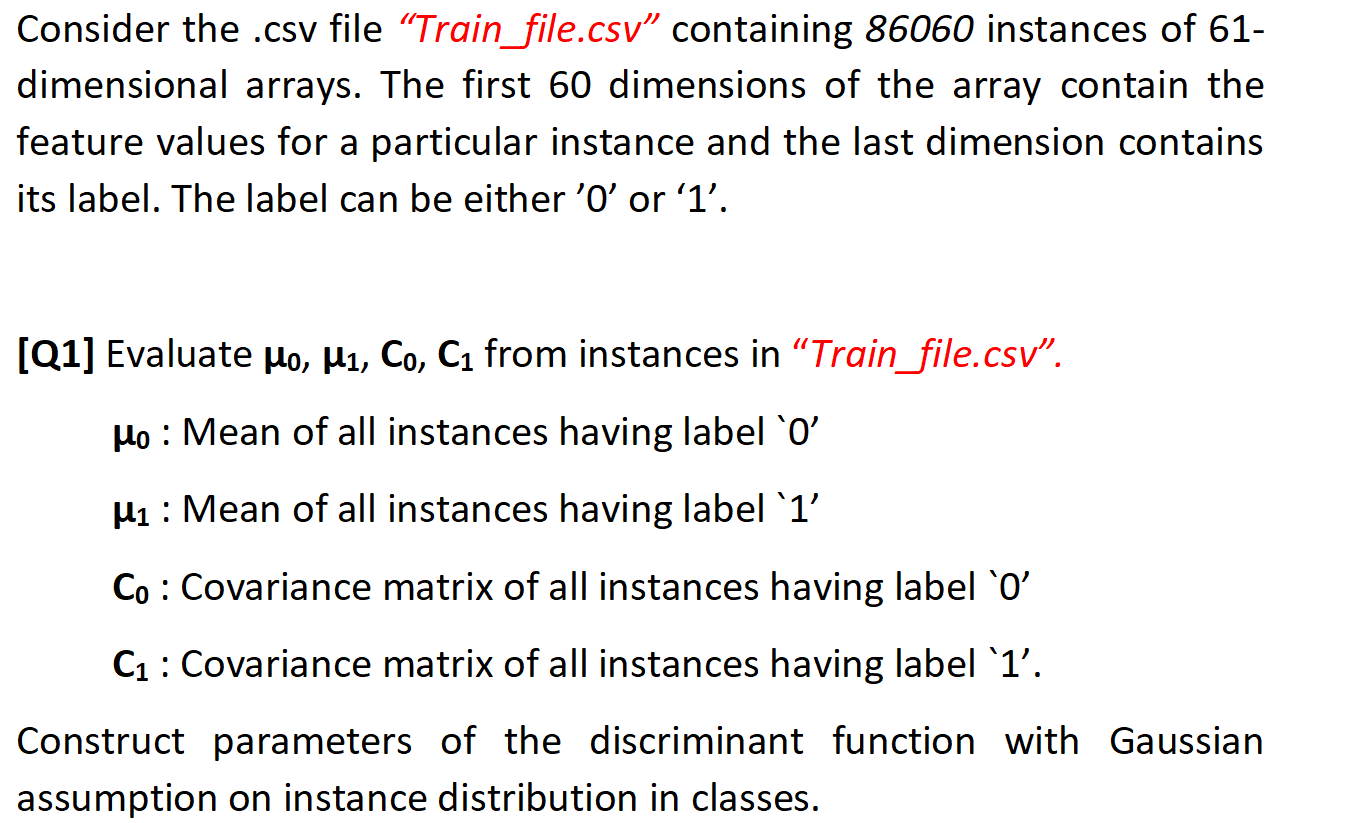

In [7]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [8]:
def LR_train(X,Y,rate,iters):
    i = 0
    points,features = X.shape
    Weights = np.zeros(features)
    Bias = 0
    i = 0
    while i < iters:
        res = np.dot(X,Weights) + Bias
        Y_proba = sigmoid(res)

        dw = (1/points)*np.dot(X.T,(Y_proba - Y))
        db = (1/points)*np.sum(Y_proba - Y)

        Weights = Weights - rate*dw
        Bias = Bias - rate*db
        i+=1
    return Weights,Bias    


In [9]:
def predict(X,Weights,Bias):
    res = np.dot(X,Weights) + Bias
    Y_proba = sigmoid(res)
    Y_pred = np.array([1 if prob > 0.5 else 0 for prob in Y_proba])
    return Y_pred


In [10]:
X = pd.read_csv("Train_file.csv")
train_X = X.iloc[:,np.arange(60)]
train_Y = X.iloc[:,60]
train_X.shape
train_Y = train_Y.astype(int)
train_X = np.array(train_X)

In [11]:
test_X = pd.read_csv("Test_file.csv")
test_Y = test_X.iloc[:,60]
test_X = test_X.iloc[:,np.arange(60)]
#print(test_X.shape)
test_Y = test_Y.astype(int)
test_X = np.array(test_X)

In [12]:
W,B = LR_train(train_X,train_Y,rate=0.01,iters=10000)

In [13]:
pred_Y = predict(test_X,W,B)

In [14]:
accuracy_1 = np.sum((test_Y == 1) & (test_Y == pred_Y))/np.sum(test_Y == 1)
print("accuracy_1 : ",accuracy_1)

accuracy_1 :  0.9230840343903115


In [15]:
accuracy_0 = np.sum((test_Y == 0) & (test_Y == pred_Y))/np.sum(test_Y == 0)
print("accuracy_0 : ",accuracy_0)

accuracy_0 :  0.9076462890259862


In [16]:
accuracy = np.sum(pred_Y == test_Y)/len(pred_Y)
print("accuracy : ",accuracy)

accuracy :  0.9154078549848943
